### Estimación cuantitativa del rendimiento energético de edificios residenciales

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from google.colab import files 
uploaded=files.upload()

In [33]:
data=pd.read_excel("ENB2012_data.xlsx")

In [34]:
names=["compacidad relativa", " área de superficie","área de pared","área de techo","altura total","orientación","área de acristalamiento", "distribución del área de acristalamiento", "carga de calefacción (HL)", "carga de refrigeración (CL)"]
data=pd.read_excel("ENB2012_data.xlsx",names=names)

#### Datos

In [35]:
data

compacidad relativa   área de superficie  área de pared  área de techo  \
0                   0.98                514.5          294.0         110.25   
1                   0.98                514.5          294.0         110.25   
2                   0.98                514.5          294.0         110.25   
3                   0.98                514.5          294.0         110.25   
4                   0.90                563.5          318.5         122.50   
..                   ...                  ...            ...            ...   
763                 0.64                784.0          343.0         220.50   
764                 0.62                808.5          367.5         220.50   
765                 0.62                808.5          367.5         220.50   
766                 0.62                808.5          367.5         220.50   
767                 0.62                808.5          367.5         220.50   

     altura total  orientación  área de acristalamiento  \
0             7.0            2                      0.0   
1             7.0            3                      0.0   
2             7.0            4                      0.0   
3             7.0            5                      0.0   
4             7.0            2                      0.0   
..            ...          ...                      ...   
763           3.5            5                      0.4   
764           3.5            2                      0.4   
765           3.5            3                      0.4   
766           3.5            4                      0.4   
767           3.5            5                      0.4   

     distribución del área de acristalamiento  carga de calefacción (HL)  \
0                                           0                      15.55   
1                                           0                      15.55   
2                                           0                      15.55   
3                                           0                      15.55   
4                                           0                      20.84   
..                                        ...                        ...   
763                                         5                      17.88   
764                                         5                      16.54   
765                                         5                      16.44   
766                                         5                      16.48   
767                                         5                      16.64   

     carga de refrigeración (CL)  
0                          21.33  
1                          21.33  
2                          21.33  
3                          21.33  
4                          28.28  
..                           ...  
763                        21.40  
764                        16.88  
765                        17.11  
766                        16.61  
767                        16.03  

[768 rows x 10 columns]

In [36]:
data.describe().T

count        mean        std  \
compacidad relativa                       768.0    0.764167   0.105777   
 área de superficie                       768.0  671.708333  88.086116   
área de pared                             768.0  318.500000  43.626481   
área de techo                             768.0  176.604167  45.165950   
altura total                              768.0    5.250000   1.751140   
orientación                               768.0    3.500000   1.118763   
área de acristalamiento                   768.0    0.234375   0.133221   
distribución del área de acristalamiento  768.0    2.812500   1.550960   
carga de calefacción (HL)                 768.0   22.307195  10.090204   
carga de refrigeración (CL)               768.0   24.587760   9.513306   

                                             min       25%     50%       75%  \
compacidad relativa                         0.62    0.6825    0.75    0.8300   
 área de superficie                       514.50  606.3750  673.75  741.1250   
área de pared                             245.00  294.0000  318.50  343.0000   
área de techo                             110.25  140.8750  183.75  220.5000   
altura total                                3.50    3.5000    5.25    7.0000   
orientación                                 2.00    2.7500    3.50    4.2500   
área de acristalamiento                     0.00    0.1000    0.25    0.4000   
distribución del área de acristalamiento    0.00    1.7500    3.00    4.0000   
carga de calefacción (HL)                   6.01   12.9925   18.95   31.6675   
carga de refrigeración (CL)                10.90   15.6200   22.08   33.1325   

                                             max  
compacidad relativa                         0.98  
 área de superficie                       808.50  
área de pared                             416.50  
área de techo                             220.50  
altura total                                7.00  
orientación                                 5.00  
área de acristalamiento                     0.40  
distribución del área de acristalamiento    5.00  
carga de calefacción (HL)                  43.10  
carga de refrigeración (CL)                48.03

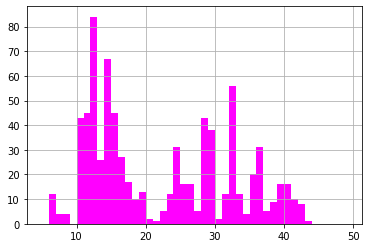

In [61]:
data["carga de calefacción (HL)"].hist(bins=np.arange(5,50,1), color="magenta")
plt.show()

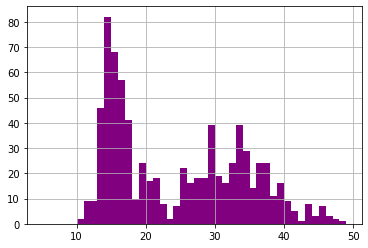

In [62]:
data["carga de refrigeración (CL)"].hist(bins=np.arange(5,50,1), color="purple")
plt.show()

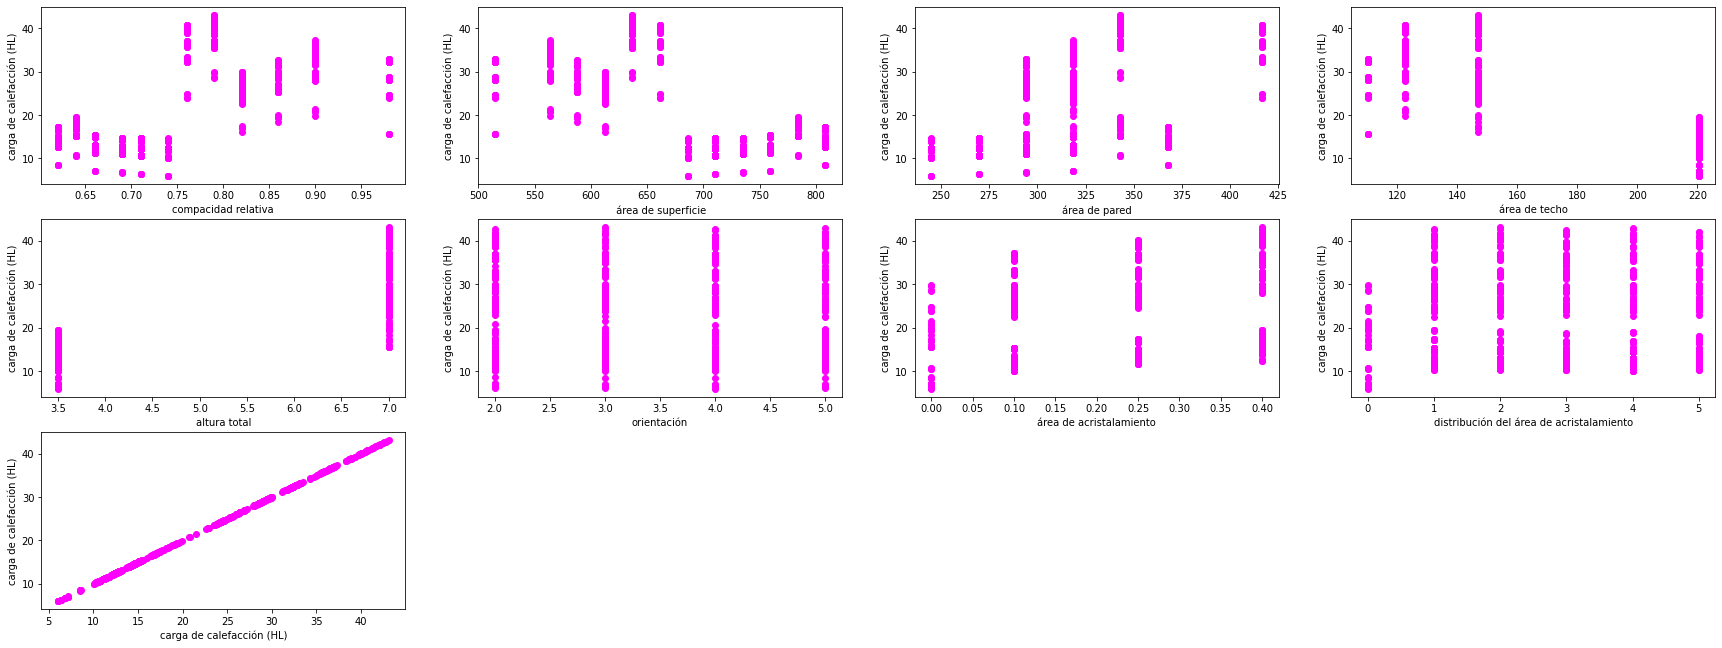

In [60]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["carga de calefacción (HL)"], color="magenta")
    plt.xlabel(j)
    plt.ylabel("carga de calefacción (HL)")
plt.show()

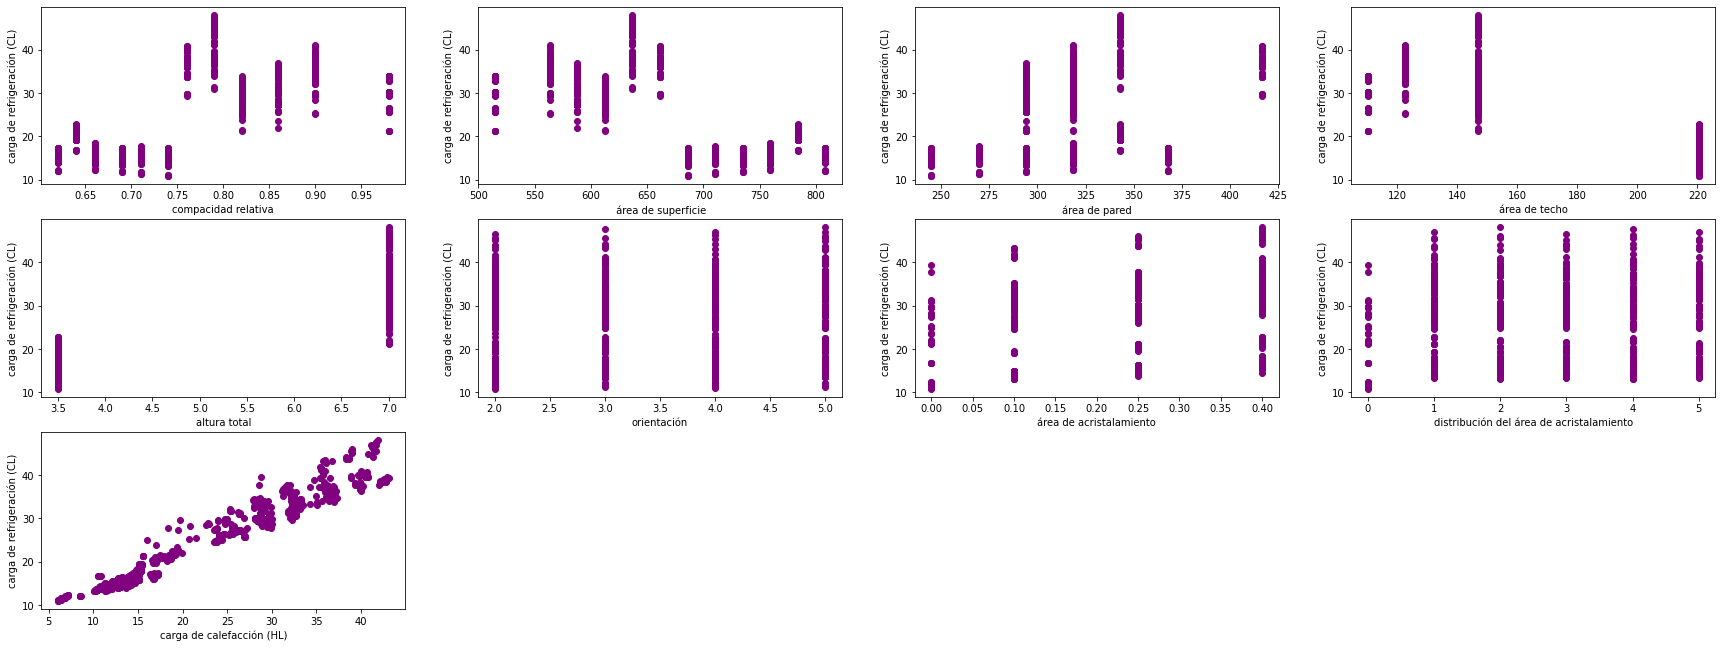

In [63]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["carga de refrigeración (CL)"], color="purple")
    plt.xlabel(j)
    plt.ylabel("carga de refrigeración (CL)")
plt.show()

## Regresión lineal método OLS

In [39]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
Y = data["carga de refrigeración (CL)"]
X = data.drop(columns=["carga de refrigeración (CL)","carga de calefacción (HL)"])
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
X

const  compacidad relativa   área de superficie  área de pared  \
0      1.0                 0.98                514.5          294.0   
1      1.0                 0.98                514.5          294.0   
2      1.0                 0.98                514.5          294.0   
3      1.0                 0.98                514.5          294.0   
4      1.0                 0.90                563.5          318.5   
..     ...                  ...                  ...            ...   
763    1.0                 0.64                784.0          343.0   
764    1.0                 0.62                808.5          367.5   
765    1.0                 0.62                808.5          367.5   
766    1.0                 0.62                808.5          367.5   
767    1.0                 0.62                808.5          367.5   

     área de techo  altura total  orientación  área de acristalamiento  \
0           110.25           7.0            2                      0.0   
1           110.25           7.0            3                      0.0   
2           110.25           7.0            4                      0.0   
3           110.25           7.0            5                      0.0   
4           122.50           7.0            2                      0.0   
..             ...           ...          ...                      ...   
763         220.50           3.5            5                      0.4   
764         220.50           3.5            2                      0.4   
765         220.50           3.5            3                      0.4   
766         220.50           3.5            4                      0.4   
767         220.50           3.5            5                      0.4   

     distribución del área de acristalamiento  
0                                           0  
1                                           0  
2                                           0  
3                                           0  
4                                           0  
..                                        ...  
763                                         5  
764                                         5  
765                                         5  
766                                         5  
767                                         5  

[768 rows x 9 columns]

In [44]:
model_linear = sm.OLS(Y, X).fit()
predictions_SM = model_linear.predict(X) 

In [45]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     carga de refrigeración (CL)   R-squared:                       0.888
Model:                                     OLS   Adj. R-squared:                  0.887
Method:                          Least Squares   F-statistic:                     859.1
Date:                         Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                                 15:29:57   Log-Likelihood:                -1979.3
No. Observations:                          768   AIC:                             3975.
Df Residuals:                              760   BIC:                             4012.
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       97.2457     20.765      4.683      0.000      56.483     138.009
compacidad relativa                        -70.7877     11.225     -6.306      0.000     -92.824     -48.751
 área de superficie                         -0.0661      0.015     -4.519      0.000      -0.095      -0.037
área de pared                                0.0225      0.004      5.365      0.000       0.014       0.031
área de techo                               -0.0443      0.008     -5.404      0.000      -0.060      -0.028
altura total                                 4.2838      0.369     11.618      0.000       3.560       5.008
orientación                                  0.1215      0.103      1.176      0.240      -0.081       0.324
área de acristalamiento                     14.7171      0.888     16.573      0.000      12.974      16.460
distribución del área de acristalamiento     0.0407      0.076      0.534      0.594      -0.109       0.190
==============================================================================
Omnibus:                      104.668   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.547
Skew:                           0.767   Prob(JB):                     8.65e-51
Kurtosis:                       5.203   Cond. No.                     1.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

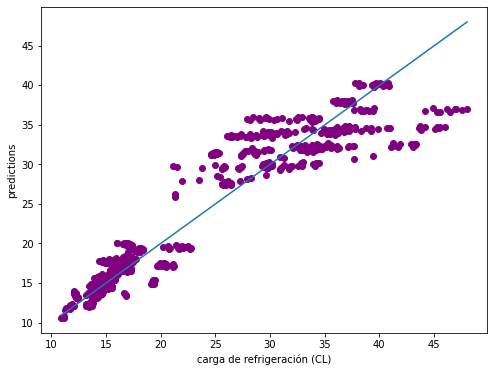

In [64]:
from matplotlib import colors
plt.figure(figsize=(8,6))
plt.scatter(data["carga de refrigeración (CL)"],predictions_SM, color="purple")
u=np.linspace(data["carga de refrigeración (CL)"].min(),data["carga de refrigeración (CL)"].max(),5)
plt.plot(u,u)
plt.xlabel("carga de refrigeración (CL)")
plt.ylabel("predictions")
plt.show()

In [65]:
rmse=np.sqrt(np.mean((data["carga de refrigeración (CL)"]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 3.184476693038549


## Regresiones lineales con machine learning

In [66]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [147]:
features=data.drop(columns=["carga de refrigeración (CL)", "carga de calefacción (HL)"])
target=data["carga de refrigeración (CL)"]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 200)

In [148]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)


Feature: 0, Score: -73.80388
Feature: 1, Score: 259131042223.96362
Feature: 2, Score: -259131042224.01010
Feature: 3, Score: -518262084448.11395
Feature: 4, Score: 4.17076
Feature: 5, Score: 0.09067
Feature: 6, Score: 14.96186
Feature: 7, Score: 0.00825


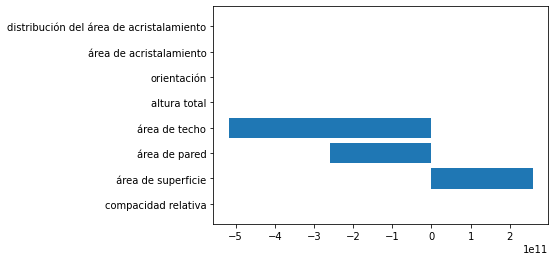

In [149]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var, importance)
plt.show()

In [150]:
LR.intercept_

103.026028347975

In [151]:
LR.coef_

array([-7.38038802e+01,  2.59131042e+11, -2.59131042e+11, -5.18262084e+11,
        4.17076302e+00,  9.06696850e-02,  1.49618573e+01,  8.24510120e-03])

In [152]:
LR.feature_names_in_

array(['compacidad relativa', ' área de superficie', 'área de pared',
       'área de techo', 'altura total', 'orientación',
       'área de acristalamiento',
       'distribución del área de acristalamiento'], dtype=object)

In [123]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [124]:
important.sort_values(by="importance")

variable    importance
3                             área de techo -5.182621e+11
2                             área de pared -2.591310e+11
0                       compacidad relativa -7.380388e+01
7  distribución del área de acristalamiento  8.245101e-03
5                               orientación  9.066969e-02
4                              altura total  4.170763e+00
6                   área de acristalamiento  1.496186e+01
1                        área de superficie  2.591310e+11

In [125]:
predictions_LR=LR.predict(features)

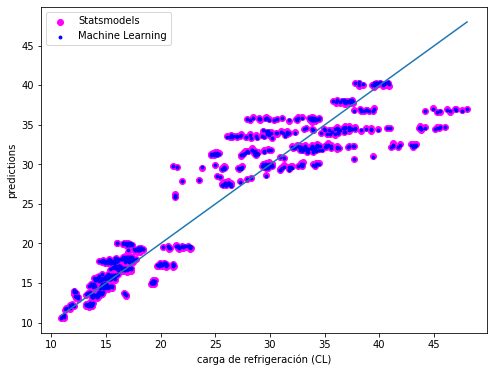

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(data["carga de refrigeración (CL)"],predictions_SM, label="Statsmodels", color="magenta")
plt.scatter(data["carga de refrigeración (CL)"],predictions_LR, label="Machine Learning", color= "blue", s=8)
u=np.linspace(data["carga de refrigeración (CL)"].min(),data["carga de refrigeración (CL)"].max(),5)
plt.plot(u,u)
plt.xlabel("carga de refrigeración (CL)")
plt.ylabel("predictions")
plt.legend()
plt.show()

#### Regresiones lineales usando machine learning sin el intercepto

In [130]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

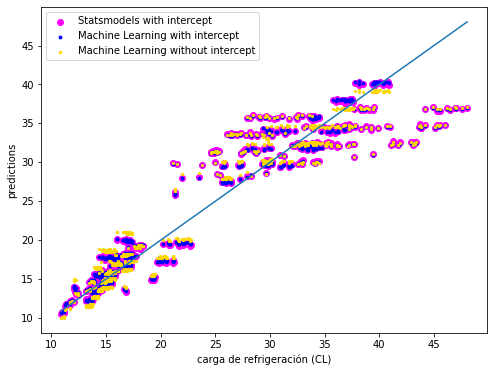

In [155]:
plt.figure(figsize=(8,6))
plt.scatter(data["carga de refrigeración (CL)"],predictions_SM, label="Statsmodels with intercept", color= "magenta")
plt.scatter(data["carga de refrigeración (CL)"],predictions_LR, label="Machine Learning with intercept", color= "blue", s=8)
plt.scatter(data["carga de refrigeración (CL)"],predictions_LR2, label="Machine Learning without intercept", color = "gold", s=5)
u=np.linspace(data["carga de refrigeración (CL)"].min(),data["carga de refrigeración (CL)"].max(),5)
plt.plot(u,u)
plt.xlabel("carga de refrigeración (CL)")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [134]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score_SM=r2_score(target,predictions_SM)
score_LR=r2_score(target,predictions_LR)
score_LR2=r2_score(target,predictions_LR2)
RMS2_SM=np.sqrt(mean_squared_error(target,predictions_SM))
RMS2_LR=np.sqrt(mean_squared_error(target,predictions_LR))
RMS2_LR2=np.sqrt(mean_squared_error(target,predictions_LR2))

for i,j in zip([score_SM,score_LR,score_LR2],["score_SM","score_LR","score_LR2"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2],["RMS2_SM","RMS2_LR","RMS2_LR2"]):
    print(j," is ",i)

score_SM  is  0.8878035507251569
score_LR  is  0.8874127494393851
score_LR2  is  0.8844699100394893
RMS2_SM  is  3.1844766930385484
RMS2_LR  is  3.1900179368693813
RMS2_LR2  is  3.2314398322696367


## Regresión lineal usando Random Forest

In [135]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100)
 
# fit the regressor with x and y data
regressor.fit(features, target) 
predictions_RF=regressor.predict(features)

In [136]:
score_RF=r2_score(target,predictions_RF)
RMS2_RF=np.sqrt(mean_squared_error(target,predictions_RF))

In [137]:
for i,j in zip([score_SM,score_LR,score_LR2,score_RF],["score_SM","score_LR","score_LR2","score_RF"]):
    print(j," is ",i)
for i,j in zip([RMS2_SM,RMS2_LR,RMS2_LR2,RMS2_RF],["RMS2_SM","RMS2_LR","RMS2_LR2","RMS2_RF"]):
    print(j," is ",i)

score_SM  is  0.8878035507251569
score_LR  is  0.8874127494393851
score_LR2  is  0.8844699100394893
score_RF  is  0.9963710296328437
RMS2_SM  is  3.1844766930385484
RMS2_LR  is  3.1900179368693813
RMS2_LR2  is  3.2314398322696367
RMS2_RF  is  0.5727172040092986


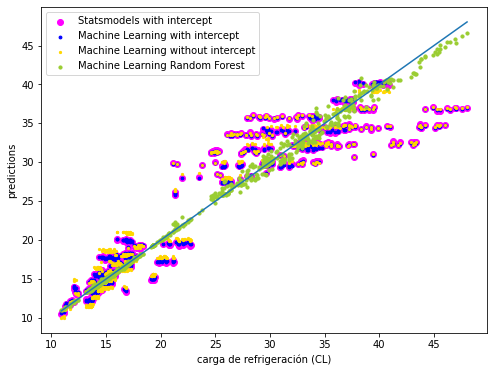

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(data["carga de refrigeración (CL)"],predictions_SM, label="Statsmodels with intercept", color= "magenta")
plt.scatter(data["carga de refrigeración (CL)"],predictions_LR, label="Machine Learning with intercept", color= "blue", s=8)
plt.scatter(data["carga de refrigeración (CL)"],predictions_LR2, label="Machine Learning without intercept", color= "gold", s=5)
plt.scatter(data["carga de refrigeración (CL)"],predictions_RF, label="Machine Learning Random Forest", color= "yellowgreen", s=10)
u=np.linspace(data["carga de refrigeración (CL)"].min(),data["carga de refrigeración (CL)"].max(),5)
plt.plot(u,u)
plt.xlabel("carga de refrigeración (CL)")
plt.ylabel("predictions")
plt.legend()
plt.show()

Feature: compacidad relativa, Score: 0.40745
Feature:  área de superficie, Score: 0.14414
Feature: área de pared, Score: 0.03888
Feature: área de techo, Score: 0.05165
Feature: altura total, Score: 0.28213
Feature: orientación, Score: 0.01256
Feature: área de acristalamiento, Score: 0.04676
Feature: distribución del área de acristalamiento, Score: 0.01643


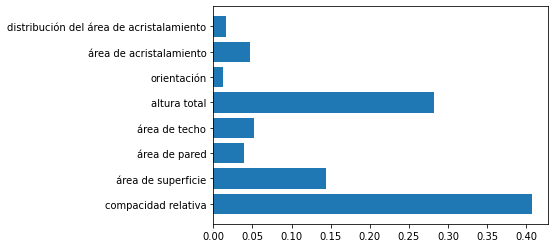

In [143]:
# get importance
var_RF=regressor.feature_names_in_
importance_RF = regressor.feature_importances_
# summarize feature importance
for i,v in zip(var_RF,importance_RF):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var_RF, importance_RF)
plt.show()

In [110]:
from sklearn import tree

In [157]:
#fn=data.feature_names
#cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=800)
tree.plot_tree(regressor.estimators_[0],
               feature_names = X.columns, 
               class_names=["carga de refrigeración (CL)"],
               filled = True, fontsize=4)
fig.savefig('rf_individualtree.png')